In [1]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
plt.style.use('fivethirtyeight')

In [5]:
data = pd.read_excel("Reviews_Data.xlsx")

In [6]:
data.head()

,Ratings,Comments
0,5,"A corporate company with a good culture, excit..."
1,3,I had a great experience I have grown in many ...
2,4,Very challenging and a lot of pressure. Needs ...
3,5,Great Exposure
4,5,Great place to work. Allows for continuous imp...


In [7]:
ratings_data = data[['Ratings','Comments']]
ratings_data[0:10]

,Ratings,Comments
0,5,"A corporate company with a good culture, excit..."
1,3,I had a great experience I have grown in many ...
2,4,Very challenging and a lot of pressure. Needs ...
3,5,Great Exposure
4,5,Great place to work. Allows for continuous imp...
5,3,I have learned a lot on how to deal with all t...
6,4,"There is structure, there is rythm, The compan..."
7,3,This is good for the first 3 months as you get...
8,5,It was a very professional workplace with assi...
9,3,"I deal with prospecting new clients, making ap..."


In [8]:
#Get the subjectivity

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Get the polarity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [9]:
#Adding two columns 

data['Subjectivity'] = data['Comments'].apply(getSubjectivity)
data['Polarity'] = data['Comments'].apply(getPolarity)

In [10]:
data.head()

,Ratings,Comments,Subjectivity,Polarity
0,5,"A corporate company with a good culture, excit...",0.450000,0.350000
1,3,I had a great experience I have grown in many ...,0.543889,0.412778
2,4,Very challenging and a lot of pressure. Needs ...,0.625000,0.437500
3,5,Great Exposure,0.750000,0.800000
4,5,Great place to work. Allows for continuous imp...,0.525000,0.400000


In [11]:
plot_data = data[['Comments','Subjectivity','Polarity']]

In [12]:
plot_data

,Comments,Subjectivity,Polarity
0,"A corporate company with a good culture, excit...",0.450000,0.350000
1,I had a great experience I have grown in many ...,0.543889,0.412778
2,Very challenging and a lot of pressure. Needs ...,0.625000,0.437500
3,Great Exposure,0.750000,0.800000
4,Great place to work. Allows for continuous imp...,0.525000,0.400000
...,...,...,...
295,"We used to set our own objectives, a day at wo...",0.520000,0.290000
296,14 Years working experience –including 8 years...,0.399242,0.154545
297,Inbound and outbound sales for short term insu...,0.466667,0.166667
298,calling and meeting clients and signing off in...,0.000000,0.000000


In [13]:
#Computing positive, negative and neutral comments

def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)

In [14]:
data.head(10)

,Ratings,Comments,Subjectivity,Polarity,Analysis
0,5,"A corporate company with a good culture, excit...",0.450000,0.350000,Positive
1,3,I had a great experience I have grown in many ...,0.543889,0.412778,Positive
2,4,Very challenging and a lot of pressure. Needs ...,0.625000,0.437500,Positive
3,5,Great Exposure,0.750000,0.800000,Positive
4,5,Great place to work. Allows for continuous imp...,0.525000,0.400000,Positive
5,3,I have learned a lot on how to deal with all t...,0.400000,-0.200000,Negative
6,4,"There is structure, there is rythm, The compan...",0.373214,-0.178571,Negative
7,3,This is good for the first 3 months as you get...,0.502381,0.382857,Positive
8,5,It was a very professional workplace with assi...,0.365000,0.415000,Positive
9,3,"I deal with prospecting new clients, making ap...",0.503030,0.224242,Positive


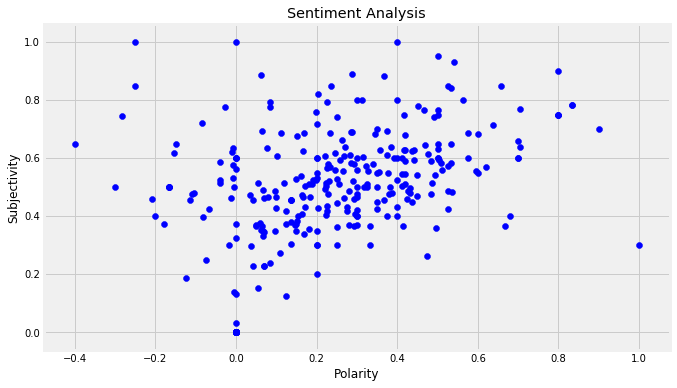

In [15]:
#Plot the polarity & subjectivity

plt.figure(figsize=(10,6))
for i in range(0, data.shape[0]):
    plt.scatter(data['Polarity'][i], data['Subjectivity'][i], color = 'Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [16]:
employees_comments = data['Comments']
employees_ratings = data['Ratings']

comments_rating1 = ' '
comments_rating2 = ' '
comments_rating3 = ' '
comments_rating4 = ' '
comments_rating5 = ' '

for rating_data, comments_data in zip(employees_ratings[0:], employees_comments[0:]):
    if rating_data == 1:
        comments_rating1 = comments_rating1 + comments_data

for rating_data, comments_data in zip(employees_ratings[0:], employees_comments[0:]):
    if rating_data == 2:
        comments_rating2 = comments_rating2 + comments_data

for rating_data, comments_data in zip(employees_ratings[0:], employees_comments[0:]):
    if rating_data == 3:
        comments_rating3 = comments_rating3 + comments_data
        
for rating_data, comments_data in zip(employees_ratings[0:], employees_comments[0:]):
    if rating_data == 4:
        comments_rating4 = comments_rating4 + comments_data
        
for rating_data, comments_data in zip(employees_ratings[0:], employees_comments[0:]):
    if rating_data == 5:
        comments_rating5 = comments_rating5 + comments_data

In [17]:
def cleanText(text):
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
    text = pattern.sub('', text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ',text)
    text = re.sub(r'#', ' ', text)
    text = re.sub(r'https?:\/\/\S+', ' ',text)
        
    return text

In [18]:
len(comments_rating1)

1079

In [19]:
clean_comments1 = cleanText(comments_rating1)

In [20]:
len(clean_comments1)

755

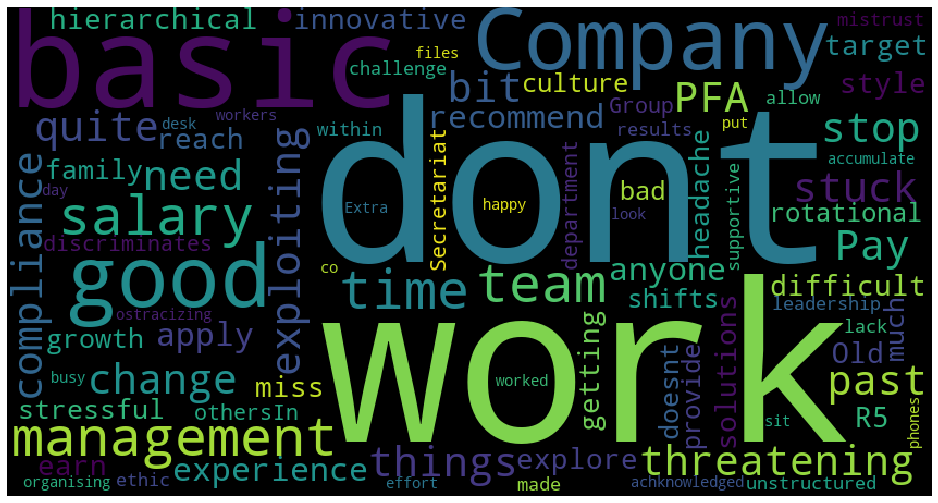

In [21]:
wordcloud = WordCloud(width = 850, height = 450).generate(clean_comments1)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Rating1"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [22]:
len(comments_rating2)

5002

In [23]:
clean_comments2 = cleanText(comments_rating2)

In [24]:
len(clean_comments2)

3316

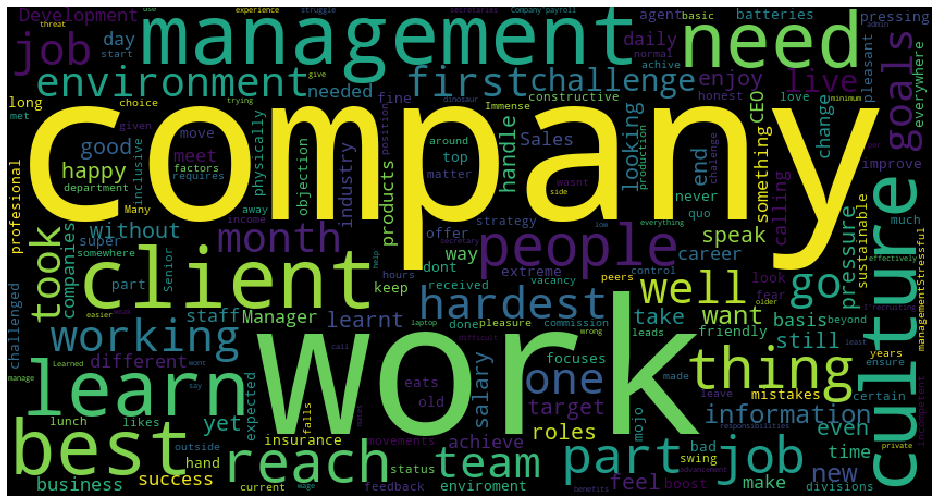

In [25]:
wordcloud = WordCloud(width = 850, height = 450).generate(clean_comments2)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Rating2"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [26]:
len(comments_rating3)

18550

In [27]:
clean_comments3 = cleanText(comments_rating3)

In [28]:
len(clean_comments3)

13417

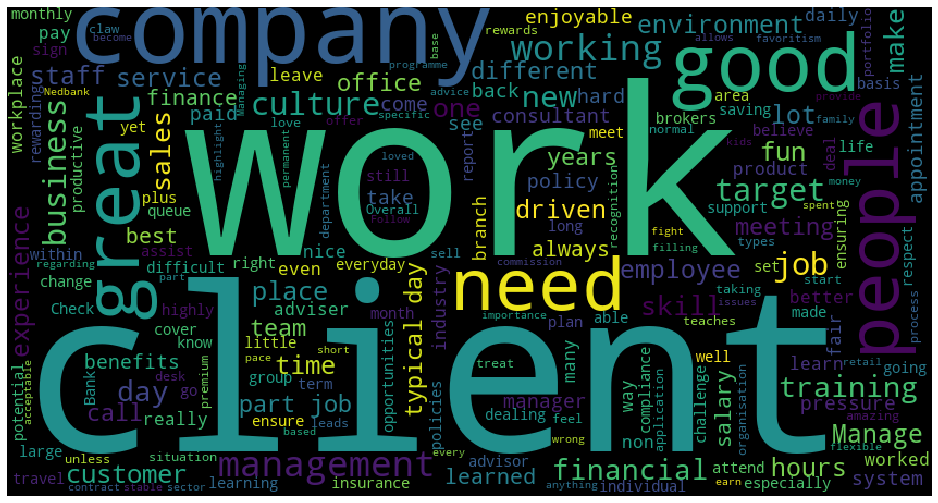

In [29]:
wordcloud = WordCloud(width = 850, height = 450).generate(clean_comments3)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Rating3"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [30]:
len(comments_rating4)

18065

In [31]:
clean_comments4 = cleanText(comments_rating4)

In [32]:
len(clean_comments4)

13029

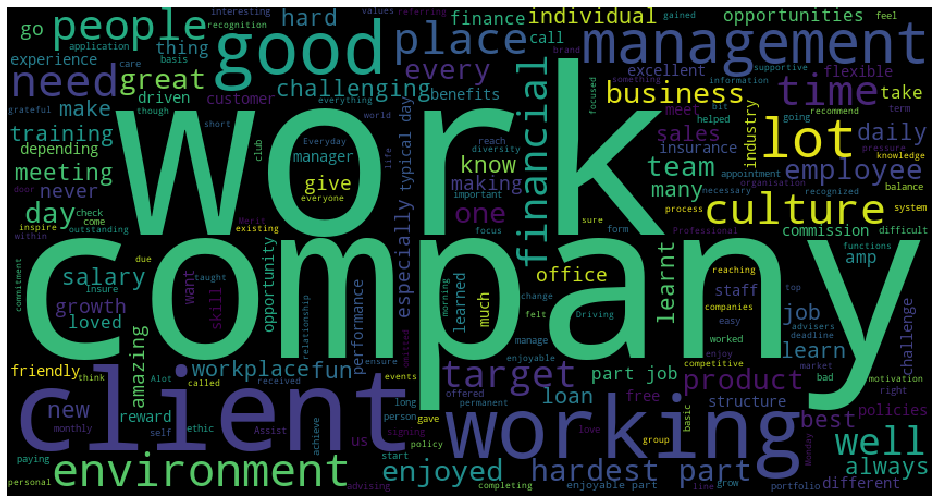

In [33]:
wordcloud = WordCloud(width = 850, height = 450).generate(clean_comments4)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Rating4"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [34]:
len(comments_rating5)

25458

In [35]:
clean_comments5 = cleanText(comments_rating5)

In [36]:
len(clean_comments5)

18618

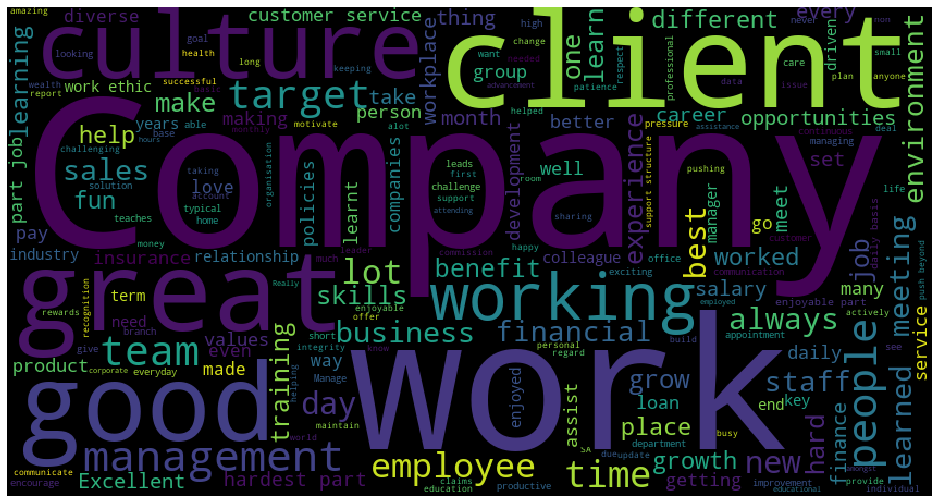

In [37]:
wordcloud = WordCloud(width = 850, height = 450).generate(clean_comments5)
plt.figure(figsize=(15,9))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("Rating5"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [38]:
data.head(10)

,Ratings,Comments,Subjectivity,Polarity,Analysis
0,5,"A corporate company with a good culture, excit...",0.450000,0.350000,Positive
1,3,I had a great experience I have grown in many ...,0.543889,0.412778,Positive
2,4,Very challenging and a lot of pressure. Needs ...,0.625000,0.437500,Positive
3,5,Great Exposure,0.750000,0.800000,Positive
4,5,Great place to work. Allows for continuous imp...,0.525000,0.400000,Positive
5,3,I have learned a lot on how to deal with all t...,0.400000,-0.200000,Negative
6,4,"There is structure, there is rythm, The compan...",0.373214,-0.178571,Negative
7,3,This is good for the first 3 months as you get...,0.502381,0.382857,Positive
8,5,It was a very professional workplace with assi...,0.365000,0.415000,Positive
9,3,"I deal with prospecting new clients, making ap...",0.503030,0.224242,Positive


In [39]:
comments_type = data['Analysis']

In [44]:
p_count = 0
n_count = 0
ne_count = 0

for p in comments_type:
    if p == 'Positive':
        p_count = p_count + 1
    elif p == 'Negative':
        n_count = n_count + 1
    else:
        ne_count = ne_count + 1

total = p_count + n_count + ne_count
print('Total comments : ',total)
print('Total positive comments : ',p_count)
print('Total negative comments : ',n_count)
print('Total neutral comments : ',ne_count)
print('\n')

positiveP = ((p_count/total)*100)
negativeP = ((n_count/total)*100)
neutralP = ((ne_count/total)*100)

print('Positive comments % ', round(positiveP,2))
print('Negative comments % ', round(negativeP,2))
print('Neutral comments % ', round(neutralP,2))

Total comments :  300
Total positive comments :  239
Total negative comments :  34
Total neutral comments :  27


Positive comments %  79.67
Negative comments %  11.33
Neutral comments %  9.0
